Dataset Link - https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset

Features:

Age: Customer's age

Gender: Customer's gender (0: Male, 1: Female)

Annual Income: Annual income of the customer in dollars

Number of Purchases: Total number of purchases made by the customer

Product Category: Category of the purchased product (0: Electronics, 1:
Clothing, 2: Home Goods, 3: Beauty, 4: Sports)

Time Spent on Website: Time spent by the customer on the website in minutes

Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)

Discounts Availed: Number of discounts availed by the customer (range: 0-5)

PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)

In [13]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
# read data
customer_df = pd.read_csv("/content/customer_purchase_data.csv")
customer_df.head(3)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1


In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [16]:
customer_df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


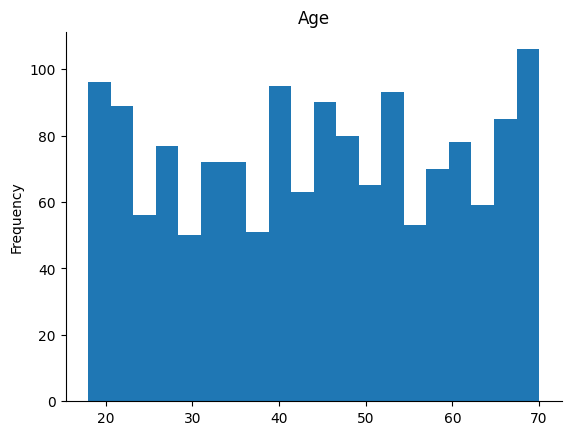

In [17]:
customer_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

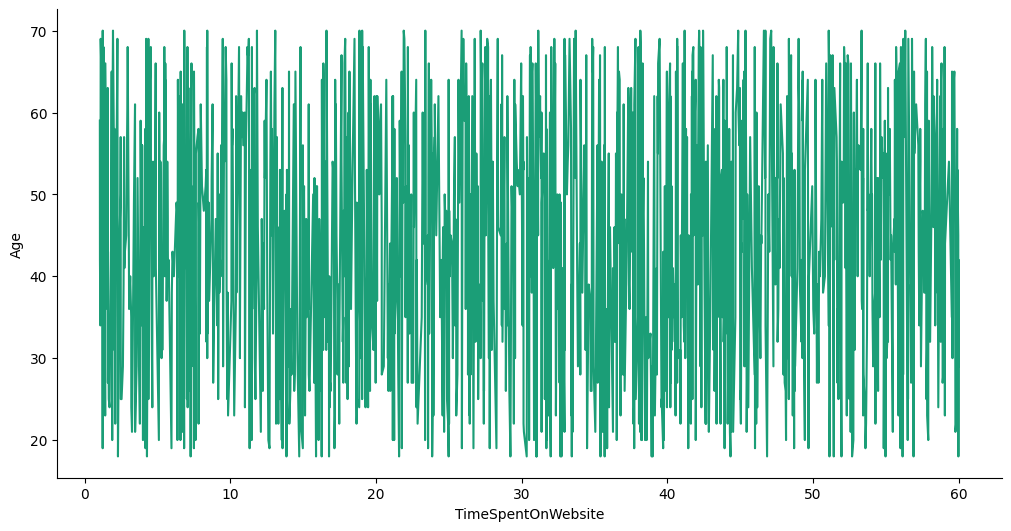

In [18]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TimeSpentOnWebsite']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = customer_df.sort_values('TimeSpentOnWebsite', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeSpentOnWebsite')
_ = plt.ylabel('Age')

In [19]:
# model development
X = customer_df.drop(["PurchaseStatus"], axis=1)
y = customer_df["PurchaseStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = DecisionTreeClassifier(criterion="entropy", random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy - ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy -  0.9133333333333333
[[164   8]
 [ 18 110]]
